<a href="https://colab.research.google.com/github/fsajad9/Deep_code/blob/main/Chapter1-part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot
import matplotlib.pyplot as plt


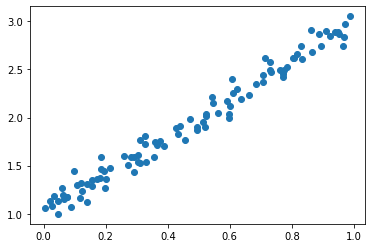

In [ ]:
n=100
w_true=2
b_true=1
np.random.seed(42)
x=np.random.rand(n,1)
epsilon=np.random.randn(n,1)
y=w_true*x+b_true+.1*epsilon
plt.scatter(x,y)

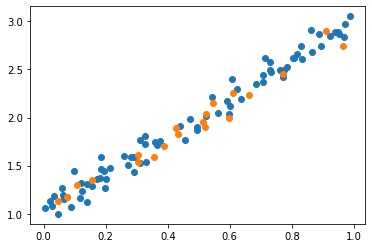

In [ ]:
idx=np.arange(n)
np.random.shuffle(idx)
train_idx=idx[:int(.8*n)]
test_idx=idx[int(.8*n):]
x_train,y_train=x[train_idx],y[train_idx]
x_test,y_test=x[test_idx],y[test_idx]
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test)

In [ ]:
np.random.seed(42)
b=np.random.randn(1)
w=np.random.randn(1)
lr=.1
n_epoch=1000
losses=[]

0.008044657695505499

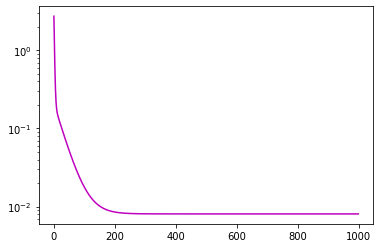

In [ ]:
for epoch in range(n_epoch):
  yhat=b+w*x_train
  error=yhat-y_train
  loss=(error**2).mean()
  losses.append(loss)
  b_grad=2*error.mean()
  w_grad=2*(x_train*error).mean()
  b=b-lr*b_grad
  w=w-lr*w_grad
plt.plot(losses,'m')  
plt.yscale('log')
loss



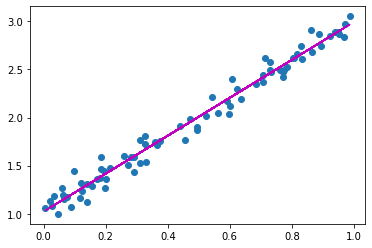

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(x_train,b+w*x_train,'m')

In [ ]:
linr=LinearRegression()
linr.fit(x_train,y_train)
print(linr.intercept_, linr.coef_[0])


[1.02354075] [1.96896447]


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'


In [ ]:
x_train_tensor=torch.as_tensor(x_train).float().to(device)
y_train_tensor=torch.as_tensor(y_train).float().to(device)



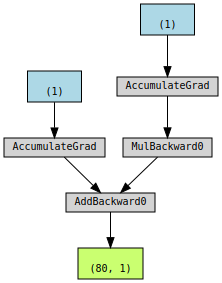

In [ ]:
torch.manual_seed(42)
b=torch.rand(1,requires_grad=True,dtype=torch.float,device=device)
w=torch.rand(1,requires_grad=True, dtype=torch.float,device= device)
yhat = b + w * x_train_tensor
error = (yhat - y_train_tensor)
loss = (error ** 2).mean()
make_dot(yhat)



No handles with labels found to put in legend.


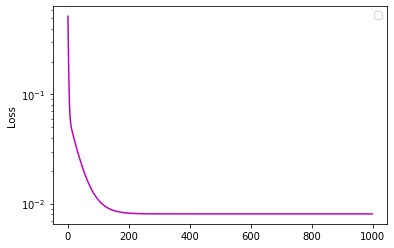

In [ ]:
#Using torch package
losses1=[]
for epoch in range(n_epoch):
  yhat=b+w*x_train_tensor
  error=(yhat-y_train_tensor)
  loss=(error**2).mean()
  o=loss.item()
  losses1.append(o)
  loss.backward()
  with torch.no_grad():
    b-=lr*b.grad
    w-=lr*w.grad
  b.grad.zero_()
  w.grad.zero_()  
plt.plot(losses1,'m')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()


In [ ]:
print(b,w)

tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


In [ ]:
torch.manual_seed(42)
b=torch.rand(1,requires_grad=True,dtype=torch.float,device=device)
w=torch.rand(1,requires_grad=True, dtype=torch.float,device= device)

No handles with labels found to put in legend.


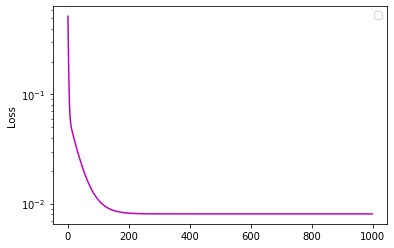

In [ ]:
#Using optim package
optimizer=optim.SGD([b,w],lr=lr)
losses2=[]
for epoch in range(n_epoch):
  yhat=b+w*x_train_tensor
  error=(yhat-y_train_tensor)
  loss=(error**2).mean()
  o=loss.item()

  losses2.append(o)
  loss.backward()
  optimizer.step() 
  optimizer.zero_grad() 
plt.plot(losses2,'m')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()

In [ ]:
torch.manual_seed(42)
b=torch.rand(1,requires_grad=True,dtype=torch.float,device=device)
w=torch.rand(1,requires_grad=True, dtype=torch.float,device= device)

No handles with labels found to put in legend.


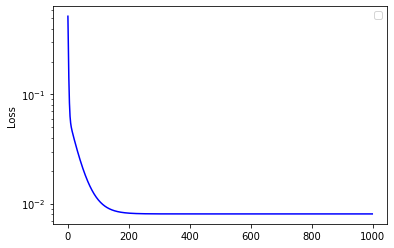

In [ ]:
#Using optim package
optimizer=optim.SGD([b,w],lr=lr)
loss_fn=nn.MSELoss(reduction='mean')

losses3=[]
for epoch in range(n_epoch):
  yhat=b+w*x_train_tensor
  loss=loss_fn(yhat,y_train_tensor)
  o=loss.item()

  losses3.append(o)
  loss.backward()
  optimizer.step() 
  optimizer.zero_grad() 
plt.plot(losses3,'b')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()